In [4]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Configurando estilo dos gr√°ficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [8]:
df = pd.read_json('/content/_position__202505242231.json')
# Muestra las primeras 5 entradas de la columna 'position'
print(df['position'].head().to_string())

0    {'id': 848, 'symbol': 'DOGEUSDT', 'direction':...
1    {'id': 877, 'symbol': 'OMUSDT', 'direction': '...
2    {'id': 786, 'symbol': 'SUSDT', 'direction': 'L...
3    {'id': 957, 'symbol': 'ACTUSDT', 'direction': ...
4    {'id': 971, 'symbol': '1000RATSUSDT', 'directi...


In [9]:
# Muestra el tipo de dato de la primera entrada en la columna 'position'
print(type(df['position'][0]))


<class 'dict'>


In [10]:
# Muestra todas las claves del primer diccionario en la columna 'position'
if isinstance(df['position'][0], dict):
    print(df['position'][0].keys())
else:
    print("La primera entrada no es un diccionario.")

dict_keys(['id', 'symbol', 'direction', 'entryPrice', 'stopLoss', 'status', 'exitPrice', 'profitPercentage', 'currentTraders', 'closeReason', 'openedAt', 'closedAt', 'cooldown', 'cooldownUntil', 'forcePercentage', 'riskScore', 'atrValue', 'tp1', 'tp2', 'tp3', 'slPercentage', 'tp1Percentage', 'tp2Percentage', 'tp3Percentage', 'tp1Size', 'tp2Size', 'tp3Size', 'hitTp1', 'hitTp2', 'tp1ExitPrice', 'tp2ExitPrice', 'tp1ProfitPercentage', 'tp2ProfitPercentage', 'finalProfitPercentage', 'isGolden', 'traderId', 'openByAdmin', 'isSignalFromTelegram', 'macdSignal', 'ema50', 'adx14', 'marketVolatilityIndex', 'breakoutConfidence', 'trendConfidence', 'rsiValue', 'macdValue', 'ema10', 'score', 'macdHistogram', 'stochRsiK', 'stochRsiD', 'ema20', 'ema200', 'supertrendValue', 'supertrendDirection', 'bollingerUpper', 'bollingerMiddle', 'bollingerLower', 'bollingerWidth', 'bollingerPercentB', 'dmiPlus', 'dmiMinus', 'obv', 'volumeEMA', 'buyVolume', 'sellVolume', 'volumeRatio', 'hasRecentHigherHigh', 'hasRec

In [11]:
# Muestra la primera entrada completa de la columna 'position'
import json
print(json.dumps(df['position'][0], indent=4))

{
    "id": 848,
    "symbol": "DOGEUSDT",
    "direction": "SHORT",
    "entryPrice": 0.20622000000000001,
    "stopLoss": 0.2154999,
    "status": "CLOSED",
    "exitPrice": 0.20538,
    "profitPercentage": null,
    "currentTraders": 1,
    "closeReason": "TRADERS_EXIT",
    "openedAt": "2025-02-25T01:45:15.622Z",
    "closedAt": "2025-02-26T21:53:08.013Z",
    "cooldown": true,
    "cooldownUntil": "2025-02-27T03:53:08.013Z",
    "forcePercentage": 32.47,
    "riskScore": 6.65,
    "atrValue": 3.324856,
    "tp1": 0.2000334,
    "tp2": 0.1938468,
    "tp3": 0.1876602,
    "slPercentage": 4.5,
    "tp1Percentage": 3.0,
    "tp2Percentage": 6.0,
    "tp3Percentage": 9.0,
    "tp1Size": 3.0,
    "tp2Size": 6.0,
    "tp3Size": 9.0,
    "hitTp1": true,
    "hitTp2": false,
    "tp1ExitPrice": 0.19999,
    "tp2ExitPrice": null,
    "tp1ProfitPercentage": 3.02,
    "tp2ProfitPercentage": null,
    "finalProfitPercentage": 1.06,
    "isGolden": false,
    "traderId": "TELEGRAM_SIGNAL",
   

In [12]:
# Normalizar la columna 'position'
df_flat = pd.json_normalize(df['position'])

# Mostrar las primeras filas del nuevo DataFrame aplanado
print(df_flat.head())

# Mostrar la informaci√≥n general del nuevo DataFrame (columnas y tipos de datos)
print(df_flat.info())

    id        symbol direction  entryPrice  stopLoss  status  exitPrice  \
0  848      DOGEUSDT     SHORT     0.20622  0.215500  CLOSED    0.20538   
1  877        OMUSDT     SHORT     7.66967  8.014805  CLOSED    7.25860   
2  786         SUSDT      LONG     0.83260  0.795133  CLOSED    0.89870   
3  957       ACTUSDT      LONG     0.20901  0.199605  CLOSED    0.20339   
4  971  1000RATSUSDT      LONG     0.02571  0.024553  CLOSED    0.02814   

  profitPercentage  currentTraders   closeReason  ... isGoodDirection score2  \
0             None               1  TRADERS_EXIT  ...            True   5.39   
1             None               1  TRADERS_EXIT  ...            True  11.48   
2             None               1           TP3  ...            True   6.60   
3             None               1  TRADERS_EXIT  ...            True   7.70   
4             None               1           TP3  ...            True   6.00   

   shouldWork isOpportunity  tvRecommendation  tvSummary  tvInterval

In [13]:
# --- Paso 2: Limpieza y preparaci√≥n de datos ---

# 1. Convertir columnas de fecha/hora a datetime
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce') # 'coerce' convertir√° errores en NaT (Not a Time)

# 2. Analizar y considerar `profitPercentage` (ya notamos que es todo nulo)
# Si no vamos a usarla y est√° toda nula, podemos incluso eliminarla para limpiar el DataFrame
# df_flat = df_flat.drop(columns=['profitPercentage'])

# 3. Rellenar valores nulos en `finalProfitPercentage` para an√°lisis, o enfocarnos en no-nulos
# Para el an√°lisis de rendimiento de posiciones cerradas, nos interesan los valores reales.
# Si quisi√©ramos usar esta columna para el c√°lculo en tiempo real, necesitar√≠amos una estrategia para los NaNs.
# Por ahora, simplemente notamos su existencia.

# Opcional: Convertir columnas booleanas con objetos/NaN a bool si es necesario (ej: hasRecentHigherHigh)
# Estas columnas como 'hasRecentHigherHigh' y 'hasRecentLowerLow' son object y tienen nulls.
# Vamos a convertirlas a booleanas. Los NaN se convertir√°n a False, lo cual es un comportamiento razonable si no hay informaci√≥n.
bool_cols_to_convert = ['hasRecentHigherHigh', 'hasRecentLowerLow']
for col in bool_cols_to_convert:
    df_flat[col] = df_flat[col].astype(bool) # Esto convertir√° True/False a bool, y None/NaN a False

# Mostrar informaci√≥n actualizada del DataFrame
print("--- DataFrame despu√©s de la limpieza inicial ---")
print(df_flat.info())

# Mostrar algunas de las columnas de fecha/hora para verificar la conversi√≥n
print("\n--- Fechas convertidas (primeras 5 filas) ---")
print(df_flat[['openedAt', 'closedAt', 'cooldownUntil']].head())

--- DataFrame despu√©s de la limpieza inicial ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     2153 non-null   int64              
 1   symbol                 2153 non-null   object             
 2   direction              2153 non-null   object             
 3   entryPrice             2153 non-null   float64            
 4   stopLoss               2153 non-null   float64            
 5   status                 2153 non-null   object             
 6   exitPrice              2141 non-null   float64            
 7   profitPercentage       0 non-null      object             
 8   currentTraders         2153 non-null   int64              
 9   closeReason            2141 non-null   object             
 10  openedAt               2153 non-null   datetime64[ns, UTC]
 11  closed

In [14]:
# Asegurarse de que las columnas de fecha/hora est√©n en formato datetime
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce')

# Extraer el d√≠a de la semana (0 = Lunes, 6 = Domingo)
df_flat['day_of_week'] = df_flat['openedAt'].dt.dayofweek

# Asegurarse de que finalProfitPercentage sea num√©rico y manejar nulos
# Para calcular la efectividad, solo consideraremos los trades donde el profitPercentage final sea conocido.
# Rellenaremos los NaNs con 0 para evitar errores en c√°lculos, pero sabiendo que son datos faltantes.
# O, mejor a√∫n, para evaluar, filtraremos solo los trades CERRADOS con profit.
df_flat['finalProfitPercentage'] = pd.to_numeric(df_flat['finalProfitPercentage'], errors='coerce')

# Para la evaluaci√≥n, nos centraremos en las posiciones que han sido cerradas y tienen un profitPercentage final.
# Creamos un DataFrame solo con posiciones cerradas para un an√°lisis de rendimiento preciso.
df_closed_positions = df_flat[df_flat['status'] == 'CLOSED'].copy()

# Opcional: Eliminar filas donde finalProfitPercentage es NaN si solo queremos evaluar trades con resultado conocido
df_closed_positions.dropna(subset=['finalProfitPercentage'], inplace=True)

print("--- DataFrame de Posiciones Cerradas preparado ---")
print(df_closed_positions[['symbol', 'openedAt', 'closedAt', 'finalProfitPercentage', 'day_of_week']].head())
print(f"N√∫mero de posiciones cerradas para an√°lisis: {len(df_closed_positions)}")

--- DataFrame de Posiciones Cerradas preparado ---
         symbol                         openedAt  \
0      DOGEUSDT 2025-02-25 01:45:15.622000+00:00   
1        OMUSDT 2025-02-25 14:15:14.778000+00:00   
2         SUSDT 2025-02-23 12:06:36.746000+00:00   
3       ACTUSDT 2025-02-27 20:30:36.970000+00:00   
4  1000RATSUSDT 2025-02-28 07:44:34.225000+00:00   

                          closedAt  finalProfitPercentage  day_of_week  
0 2025-02-26 21:53:08.013000+00:00                   1.06            1  
1 2025-02-26 21:53:10.443000+00:00                   5.25            1  
2 2025-02-23 18:24:30.376000+00:00                   7.94            6  
3 2025-02-27 20:58:41.180000+00:00                  -2.69            3  
4 2025-02-28 10:39:25.257000+00:00                   9.45            4  
N√∫mero de posiciones cerradas para an√°lisis: 2141


In [15]:
# --- Paso 3: Definir y Evaluar Estrategias de Entrada (para direcci√≥n LONG) ---

# Nos enfocaremos en las posiciones que se abrieron con una direcci√≥n 'LONG'.
df_long_closed = df_closed_positions[df_closed_positions['direction'] == 'LONG'].copy()

print("\n--- Evaluaci√≥n de Estrategias de Entrada (solo para LONG) ---")

strategies = {
    # Estrategias basadas en se√±ales preexistentes/compuestas
    'Estrategia_1_isOpportunity': lambda df: df['isOpportunity'] == True,
    'Estrategia_2_shouldWork': lambda df: df['shouldWork'] == True,
    'Estrategia_3_GoodDir_ShouldWork': lambda df: (df['isGoodDirection'] == True) & (df['shouldWork'] == True),
    'Estrategia_4_ScoreHigh': lambda df: df['score'] > 7.0, # Umbral arbitrario, podemos ajustarlo
    'Estrategia_5_Score2High': lambda df: df['score2'] > 8.0, # Umbral arbitrario, podemos ajustarlo

    # Estrategias basadas en indicadores t√©cnicos clave
    'Estrategia_6_RSI_Oversold': lambda df: df['rsiValue'] < 30,
    'Estrategia_7_MACD_Bullish': lambda df: df['macdHistogram'] > 0,
    'Estrategia_8_EMA_Cross_ShortTerm': lambda df: (df['ema10'] > df['ema20']), # EMA10 sobre EMA20
    'Estrategia_9_Supertrend_Up': lambda df: df['supertrendDirection'] == 'UP',
    'Estrategia_10_Bollinger_BottomReversal': lambda df: (df['bollingerPercentB'] < 0.2) & (df['rsiValue'] < 40), # Precio cerca de banda inferior
    'Estrategia_11_Volume_IncreasedBuy': lambda df: df['buyVolume'] > df['sellVolume'], # M√°s volumen de compra que venta
    'Estrategia_12_ADX_TrendStrength': lambda df: (df['adx14'] > 25) & (df['dmiPlus'] > df['dmiMinus']), # Fuerte tendencia alcista

    # Estrategias Combinadas (ejemplos)
    'Estrategia_13_Compound_1': lambda df: (df['isOpportunity'] == True) & (df['rsiValue'] < 40) & (df['macdHistogram'] > 0),
    'Estrategia_14_Compound_2': lambda df: (df['shouldWork'] == True) & (df['ema10'] > df['ema20']) & (df['supertrendDirection'] == 'UP'),
    'Estrategia_15_RiskScore_Low': lambda df: df['riskScore'] < 5.0, # Intentar entrar en trades de bajo riesgo
    'Estrategia_16_TrendConf_High': lambda df: df['trendConfidence'] > 60.0, # Entrar solo con alta confianza en la tendencia
}

results = {}

for name, strategy_func in strategies.items():
    # Aplicar la estrategia para obtener las se√±ales
    # Es importante usar el DataFrame original (df_flat) o al menos uno que incluya trades no cerrados
    # para generar las SE√ëALES, ya que una se√±al de entrada se genera antes de que un trade se cierre.
    # Pero para EVALUAR el RENDIMIENTO, usaremos df_long_closed.

    # Aqu√≠ estamos simulando que estas estrategias *habr√≠an generado* una se√±al de entrada.
    # Para la evaluaci√≥n de rendimiento, filtramos las posiciones ya cerradas que cumplen la se√±al.

    # Identificar los IDs de las posiciones que cumplen la estrategia de entrada en el DataFrame completo (df_flat)
    signal_ids = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']

    # Filtrar las posiciones *cerradas* que activaron esta se√±al de entrada
    trades_with_signal = df_long_closed[df_long_closed['id'].isin(signal_ids)].copy()

    total_trades = len(trades_with_signal)

    if total_trades > 0:
        profitable_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] > 0]
        num_profitable = len(profitable_trades)

        profit_percentage = (num_profitable / total_trades) * 100
        avg_profit = trades_with_signal['finalProfitPercentage'].mean()

        # Calcular el promedio de p√©rdida (solo para trades con p√©rdida)
        losing_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] < 0]
        avg_loss = losing_trades['finalProfitPercentage'].mean() if len(losing_trades) > 0 else 0

        # Ratio Riesgo/Recompensa promedio (muy simplificado, solo basado en promedio de profit/loss)
        # Un ratio positivo significa que en promedio ganamos m√°s de lo que perdemos.
        risk_reward_ratio = abs(avg_profit / avg_loss) if avg_loss != 0 else float('inf') # Inf si no hay p√©rdidas

        results[name] = {
            'Total Se√±ales (LONG)': len(signal_ids), # N√∫mero de veces que la se√±al se activ√≥ (pueden ser trades que no se cerraron a√∫n)
            'Trades Cerrados con Se√±al': total_trades, # N√∫mero de trades que se cerraron y activaron esta se√±al
            'Trades Rentables': num_profitable,
            'Porcentaje de Acierto (%)': round(profit_percentage, 2),
            'Ganancia Promedio (%)': round(avg_profit, 2),
            'P√©rdida Promedio (%)': round(avg_loss, 2),
            'Ratio Riesgo/Recompensa (Avg)': round(risk_reward_ratio, 2) if risk_reward_ratio != float('inf') else 'Inf'
        }
    else:
        results[name] = {
            'Total Se√±ales (LONG)': len(signal_ids),
            'Trades Cerrados con Se√±al': 0,
            'Trades Rentables': 0,
            'Porcentaje de Acierto (%)': 0.0,
            'Ganancia Promedio (%)': 0.0,
            'P√©rdida Promedio (%)': 0.0,
            'Ratio Riesgo/Recompensa (Avg)': 0.0
        }

# Convertir los resultados a un DataFrame para una mejor visualizaci√≥n
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Estrategia'

# Ordenar por Ganancia Promedio y luego Porcentaje de Acierto
results_df_sorted = results_df.sort_values(by=['Ganancia Promedio (%)', 'Porcentaje de Acierto (%)'], ascending=[False, False])

print("\n--- Resumen de Rendimiento de las Estrategias de Entrada (LONG) ---")
print(results_df_sorted.to_string())


--- Evaluaci√≥n de Estrategias de Entrada (solo para LONG) ---

--- Resumen de Rendimiento de las Estrategias de Entrada (LONG) ---
                                        Total Se√±ales (LONG)  Trades Cerrados con Se√±al  Trades Rentables  Porcentaje de Acierto (%)  Ganancia Promedio (%)  P√©rdida Promedio (%)  Ratio Riesgo/Recompensa (Avg)
Estrategia                                                                                                                                                                                                      
Estrategia_1_isOpportunity                               294                        291               174                      59.79                   1.30                 -3.99                           0.33
Estrategia_3_GoodDir_ShouldWork                          750                        749               427                      57.01                   1.28                 -3.83                           0.33
Estrategia_2_shouldWork     

In [16]:
# --- Paso 4: Influencia del D√≠a de la Semana ---

print("\n--- An√°lisis por D√≠a de la Semana para Estrategias Seleccionadas ---")

# Selecciona las estrategias que te parezcan m√°s prometedoras de la tabla anterior
# Puedes elegir las top 3 o 5, o cualquier otra que te interese.
# Por ejemplo, tomemos la estrategia con la mayor "Ganancia Promedio (%)"
top_strategy_name = results_df_sorted.index[0]
top_strategy_func = strategies[top_strategy_name]

print(f"\nAnalizando la estrategia: {top_strategy_name}")

# Filtrar trades que activaron la estrategia top y que son LONG y cerrados
signal_ids_top_strategy = df_flat[top_strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
trades_top_strategy = df_long_closed[df_long_closed['id'].isin(signal_ids_top_strategy)].copy()

if len(trades_top_strategy) > 0:
    # Agrupar por d√≠a de la semana y calcular m√©tricas
    daily_performance = trades_top_strategy.groupby('day_of_week')['finalProfitPercentage'].agg(
        total_trades='count',
        avg_profit='mean',
        positive_trades=lambda x: (x > 0).sum()
    ).reset_index()

    daily_performance['profit_percentage'] = (daily_performance['positive_trades'] / daily_performance['total_trades']) * 100

    # Mapear el n√∫mero del d√≠a de la semana a nombres
    day_names = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    daily_performance['day_name'] = daily_performance['day_of_week'].map(day_names)

    print(daily_performance[['day_name', 'total_trades', 'avg_profit', 'profit_percentage']].sort_values('avg_profit', ascending=False).to_string())
else:
    print(f"No hay trades cerrados para la estrategia '{top_strategy_name}' para analizar por d√≠a de la semana.")


--- An√°lisis por D√≠a de la Semana para Estrategias Seleccionadas ---

Analizando la estrategia: Estrategia_1_isOpportunity
    day_name  total_trades  avg_profit  profit_percentage
2  Mi√©rcoles            47    2.912766          76.595745
3     Jueves            28    2.310714          67.857143
5     S√°bado            43    1.620465          65.116279
1     Martes            70    1.103714          55.714286
0      Lunes            27    0.365926          55.555556
4    Viernes            46    0.314348          50.000000
6    Domingo            30    0.179333          46.666667



--- An√°lisis Detallado de Rendimiento para la Estrategia_1_isOpportunity ---

--- 5.1 Resultados por D√≠a de la Semana ---


<ipython-input-21-3af5a7aeb39d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')


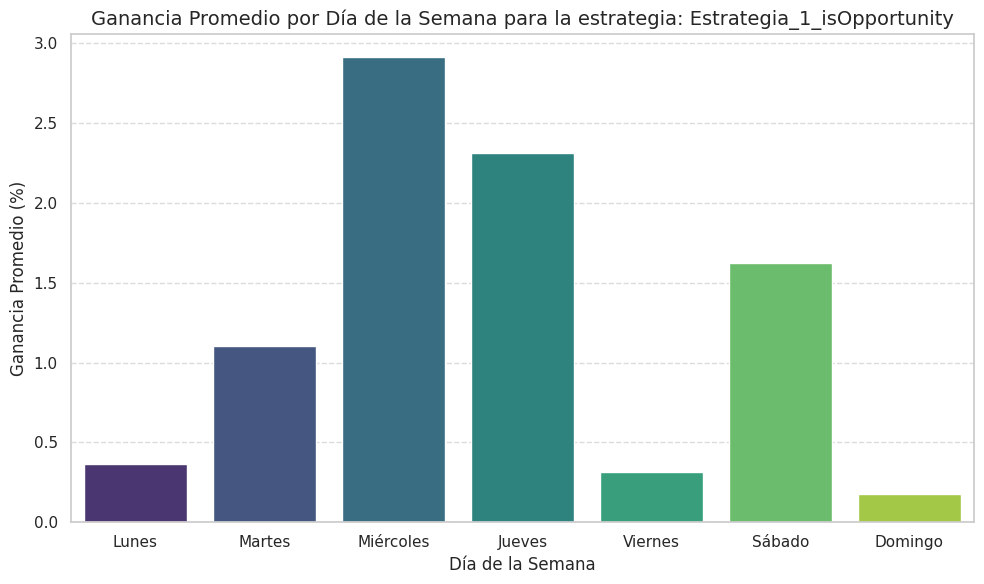

<ipython-input-21-3af5a7aeb39d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_name', y='finalProfitPercentage',


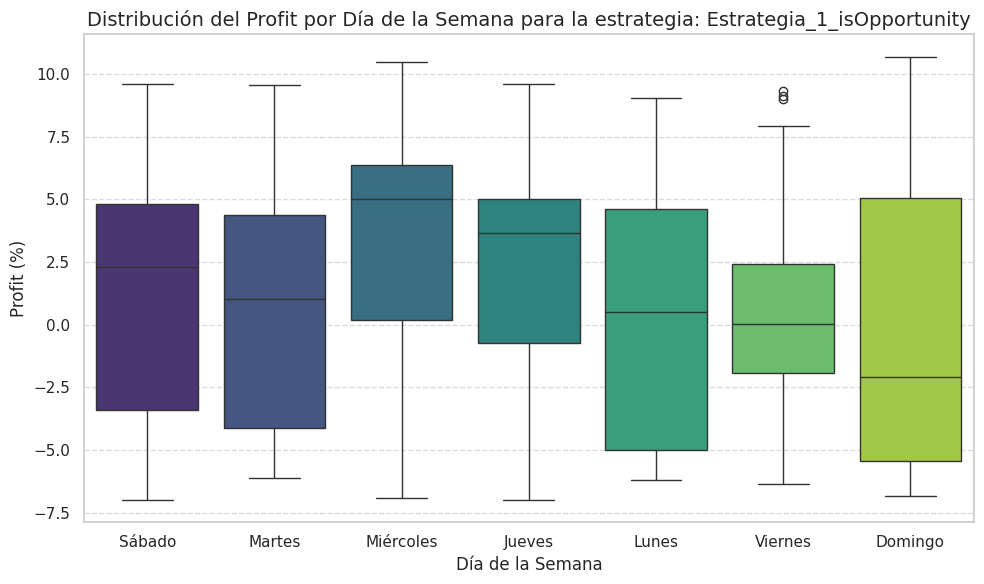


Rendimiento por D√≠a de la Semana (Estrategia_1_isOpportunity):
 day_name  avg_profit  total_trades
    Lunes    0.365926            27
   Martes    1.103714            70
Mi√©rcoles    2.912766            47
   Jueves    2.310714            28
  Viernes    0.314348            46
   S√°bado    1.620465            43
  Domingo    0.179333            30

Los d√≠as √≥ptimos identificados son: Mi√©rcoles, Jueves

--- 5.2 Resultados por Hora del D√≠a (Solo para Mi√©rcoles y Jueves) ---


<ipython-input-21-3af5a7aeb39d>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')


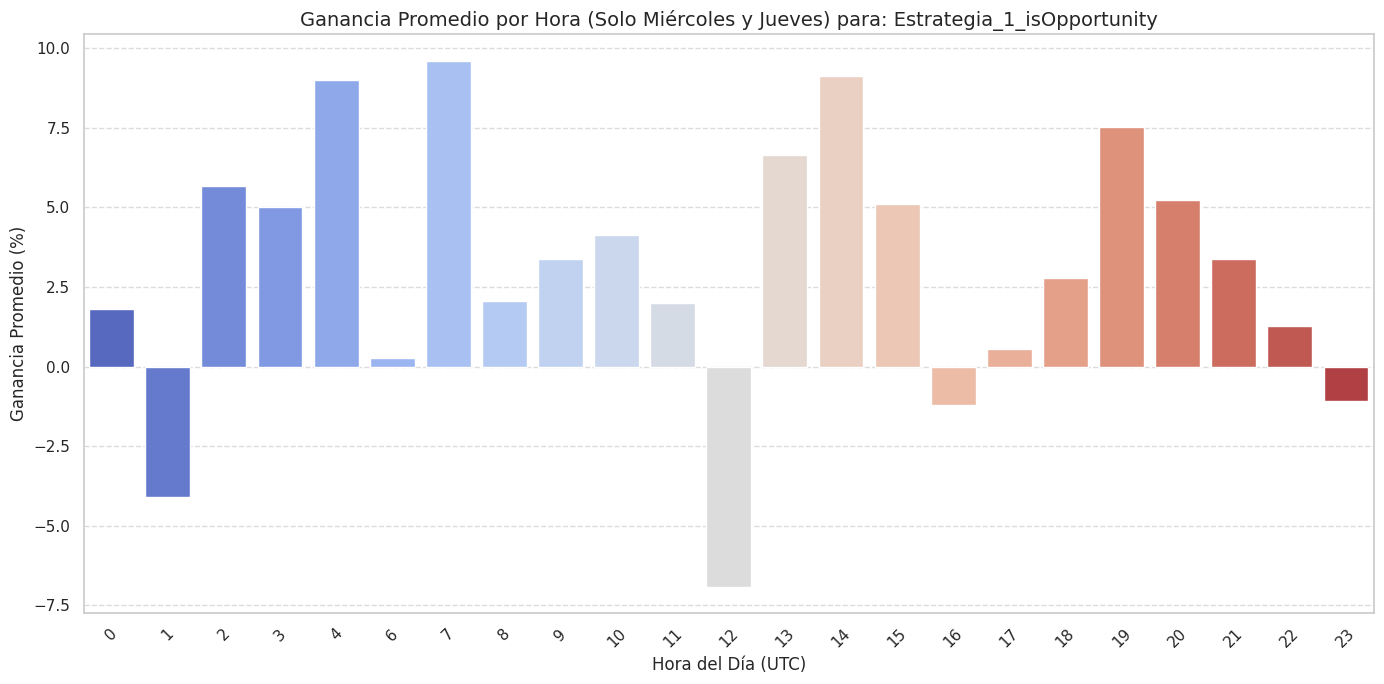

<ipython-input-21-3af5a7aeb39d>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')


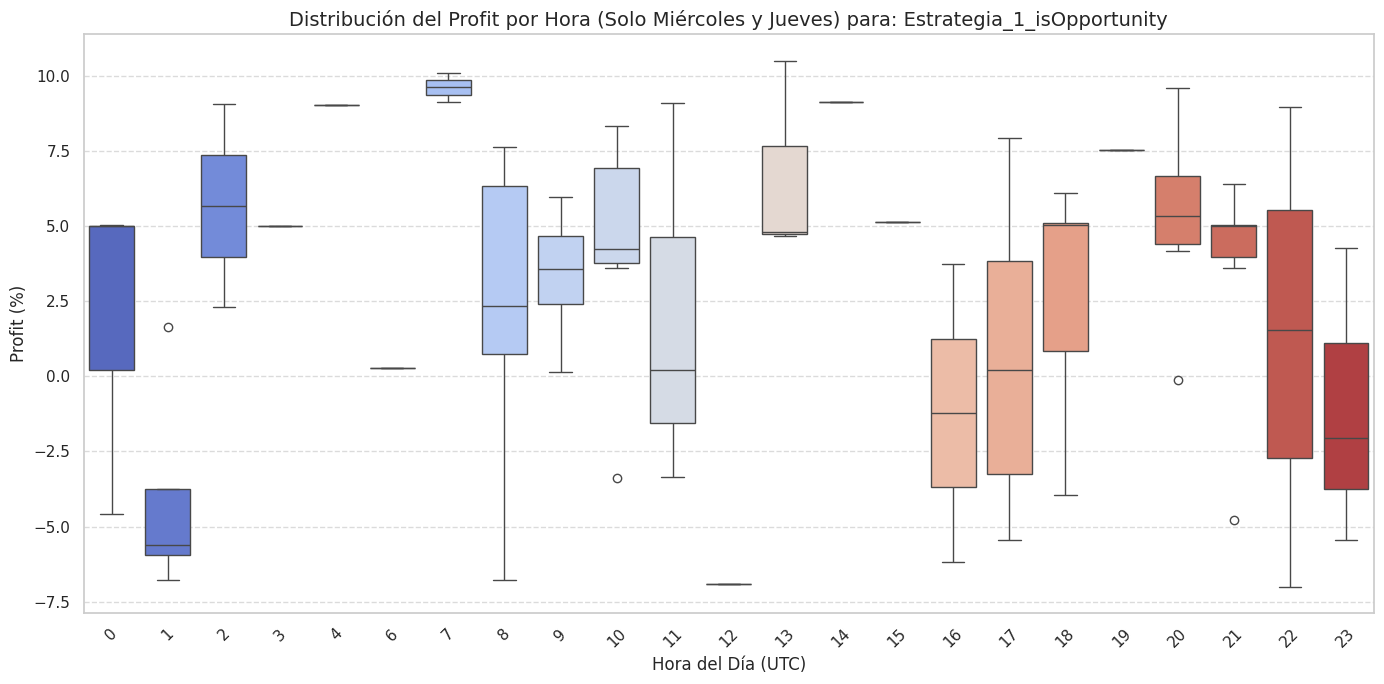


Rendimiento por Hora del D√≠a (Mi√©rcoles y Jueves):
 open_hour  avg_profit  total_trades
         0    1.813333             3
         1   -4.087500             4
         2    5.675000             2
         3    5.000000             1
         4    9.010000             1
         6    0.260000             1
         7    9.615000             2
         8    2.056000             5
         9    3.373333             6
        10    4.126667             6
        11    1.983333             3
        12   -6.920000             1
        13    6.650000             3
        14    9.130000             1
        15    5.120000             1
        16   -1.225000             2
        17    0.550000             7
        18    2.796667             6
        19    7.540000             1
        20    5.221667             6
        21    3.376667             6
        22    1.262500             4
        23   -1.070000             3

Las horas √≥ptimas identificadas dentro de los mejores d√

In [21]:
import os # Importar el m√≥dulo os

# --- Paso 5: Visualizar el rendimiento de la mejor estrategia y sus optimizaciones temporales ---

print("\n--- An√°lisis Detallado de Rendimiento para la Estrategia_1_isOpportunity ---")

# --- Preparaci√≥n inicial de la estrategia y los datos ---
strategy_name = 'Estrategia_1_isOpportunity'

# Aseg√∫rate de que 'strategies' es un diccionario que contiene tu funci√≥n para la estrategia
# y que 'df_flat' y 'df_long_closed' est√°n disponibles desde pasos anteriores.
# 'df_flat' debe contener la columna 'isOpportunity' y 'direction'.
# 'df_long_closed' debe contener los trades ya filtrados por 'LONG' y 'CLOSED' y 'openedAt'.
strategy_func = strategies[strategy_name]

# Filtrar trades que activaron la Estrategia_1_isOpportunity (que son LONG y cerrados)
signal_ids_vis = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
trades_to_visualize = df_long_closed[df_long_closed['id'].isin(signal_ids_vis)].copy()

# Crear la carpeta 'images' si no existe
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio '{output_dir}' creado para guardar gr√°ficos.")


if len(trades_to_visualize) > 0:
    # --- A√±adir columnas temporales para el an√°lisis ---
    trades_to_visualize['day_of_week'] = trades_to_visualize['openedAt'].dt.dayofweek
    day_names_map = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    trades_to_visualize['day_name'] = trades_to_visualize['day_of_week'].map(day_names_map)
    trades_to_visualize['open_hour'] = trades_to_visualize['openedAt'].dt.hour


    # --- 5.1 An√°lisis por D√≠a de la Semana ---
    print("\n--- 5.1 Resultados por D√≠a de la Semana ---")
    daily_performance_vis = trades_to_visualize.groupby('day_of_week')['finalProfitPercentage'].agg(
        avg_profit='mean',
        median_profit='median',
        total_trades='count'
    ).reset_index()
    daily_performance_vis['day_name'] = daily_performance_vis['day_of_week'].map(day_names_map)
    daily_performance_vis = daily_performance_vis.sort_values('day_of_week')

    # Gr√°fico de barras de Ganancia Promedio por D√≠a de la Semana
    plt.figure(figsize=(10, 6))
    sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')
    plt.title(f'Ganancia Promedio por D√≠a de la Semana para la estrategia: {strategy_name}', fontsize=14)
    plt.xlabel('D√≠a de la Semana', fontsize=12)
    plt.ylabel('Ganancia Promedio (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'avg_profit_by_day.png'))
    plt.show()

    # Boxplot de Distribuci√≥n del Profit por D√≠a de la Semana
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day_name', y='finalProfitPercentage',
                data=trades_to_visualize.sort_values('day_of_week', key=lambda x: x.map({v:k for k,v in day_names_map.items()})),
                palette='viridis')
    plt.title(f'Distribuci√≥n del Profit por D√≠a de la Semana para la estrategia: {strategy_name}', fontsize=14)
    plt.xlabel('D√≠a de la Semana', fontsize=12)
    plt.ylabel('Profit (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'profit_distribution_by_day.png'))
    plt.show()

    print("\nRendimiento por D√≠a de la Semana (Estrategia_1_isOpportunity):")
    print(daily_performance_vis[['day_name', 'avg_profit', 'total_trades']].to_string(index=False))

    # Identificar los mejores d√≠as basados en el an√°lisis previo
    # Mi√©rcoles (2) y Jueves (3) son los que tienen mayor ganancia promedio
    best_days_of_week_numbers = [2, 3] # Lunes=0, Martes=1, Mi√©rcoles=2, Jueves=3, Viernes=4, S√°bado=5, Domingo=6
    best_days_names = [day_names_map[d] for d in best_days_of_week_numbers]
    print(f"\nLos d√≠as √≥ptimos identificados son: {', '.join(best_days_names)}")

    # --- 5.2 An√°lisis por Hora del D√≠a (FILTRADO POR LOS MEJORES D√çAS) ---
    print("\n--- 5.2 Resultados por Hora del D√≠a (Solo para Mi√©rcoles y Jueves) ---")

    # Filtrar el DataFrame para incluir solo los trades de los mejores d√≠as
    trades_best_days = trades_to_visualize[trades_to_visualize['day_of_week'].isin(best_days_of_week_numbers)].copy()

    if len(trades_best_days) > 0:
        hourly_performance_best_days = trades_best_days.groupby('open_hour')['finalProfitPercentage'].agg(
            avg_profit='mean',
            median_profit='median',
            total_trades='count'
        ).reset_index()
        hourly_performance_best_days = hourly_performance_best_days.sort_values('open_hour')

        # Gr√°fico de barras de Ganancia Promedio por Hora (solo mejores d√≠as)
        plt.figure(figsize=(14, 7))
        sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')
        plt.title(f'Ganancia Promedio por Hora (Solo Mi√©rcoles y Jueves) para: {strategy_name}', fontsize=14)
        plt.xlabel('Hora del D√≠a (UTC)', fontsize=12)
        plt.ylabel('Ganancia Promedio (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'avg_profit_by_hour_best_days.png')) # Nuevo nombre de archivo
        plt.show()

        # Boxplot de Distribuci√≥n del Profit por Hora (solo mejores d√≠as)
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')
        plt.title(f'Distribuci√≥n del Profit por Hora (Solo Mi√©rcoles y Jueves) para: {strategy_name}', fontsize=14)
        plt.xlabel('Hora del D√≠a (UTC)', fontsize=12)
        plt.ylabel('Profit (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'profit_distribution_by_hour_best_days.png')) # Nuevo nombre de archivo
        plt.show()

        print("\nRendimiento por Hora del D√≠a (Mi√©rcoles y Jueves):")
        print(hourly_performance_best_days[['open_hour', 'avg_profit', 'total_trades']].to_string(index=False))

        # Identificar las mejores horas basadas en este an√°lisis (ej. > 0.0% de ganancia promedio)
        optimal_hours_combined = hourly_performance_best_days[hourly_performance_best_days['avg_profit'] > 0]['open_hour'].tolist()
        if optimal_hours_combined:
            print(f"\nLas horas √≥ptimas identificadas dentro de los mejores d√≠as son: {optimal_hours_combined}")
        else:
            print("\nNo se identificaron horas √≥ptimas con ganancia promedio positiva dentro de los mejores d√≠as.")

    else:
        print("No hay trades en los d√≠as √≥ptimos para analizar por hora.")


    # --- 5.3 An√°lisis Combinado Final: D√≠as √ìptimos Y Horas √ìptimas ---
    print("\n--- 5.3 Rendimiento Combinado: D√≠as √ìptimos y Horas √ìptimas ---")

    # Asegurarse de que optimal_hours_combined tiene valores antes de usarlo
    if 'optimal_hours_combined' in locals() and optimal_hours_combined:
        final_optimized_trades = trades_best_days[trades_best_days['open_hour'].isin(optimal_hours_combined)].copy()

        if len(final_optimized_trades) > 0:
            total_trades_final_optimized = len(final_optimized_trades)
            profitable_trades_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] > 0]
            num_profitable_final_optimized = len(profitable_trades_final_optimized)

            percentage_of_success_final_optimized = (num_profitable_final_optimized / total_trades_final_optimized) * 100
            avg_profit_final_optimized = final_optimized_trades['finalProfitPercentage'].mean()
            avg_loss_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] <= 0]['finalProfitPercentage'].mean()

            print(f"Total de trades (optimizado por D√≠a y Hora): {total_trades_final_optimized}")
            print(f"Trades rentables (optimizado por D√≠a y Hora): {num_profitable_final_optimized}")
            print(f"Porcentaje de Acierto (Optimizado): {percentage_of_success_final_optimized:.2f}%")
            print(f"Ganancia Promedio (Optimizado): {avg_profit_final_optimized:.2f}%")
            print(f"P√©rdida Promedio (Optimizado): {avg_loss_final_optimized:.2f}%")

            if avg_loss_final_optimized and avg_loss_final_optimized < 0:
                risk_reward_ratio_final_optimized = abs(avg_profit_final_optimized / avg_loss_final_optimized)
                print(f"Ratio Riesgo/Recompensa (Optimizado): {risk_reward_ratio_final_optimized:.2f}")
            else:
                print("Ratio Riesgo/Recompensa (Optimizado): N/A (no hubo p√©rdidas en este conjunto optimizado)")

        else:
            print("No se encontraron trades que cumplan con la estrategia combinada de d√≠as y horas √≥ptimas.")
    else:
        print("No se pudieron determinar las horas √≥ptimas para el an√°lisis combinado final.")

else:
    print(f"No hay trades para visualizar para la estrategia '{strategy_name}'. Aseg√∫rate de que 'df_flat' y 'df_long_closed' est√°n correctamente preparados.")


--- Simulaci√≥n de Crecimiento de Capital a 6 Meses (Optimizado por D√≠a y Hora) ---
Capital Inicial: 5000 euros
Ganancia Promedio por Trade (Estrategia Optimizada): 3.55%
Trades por Semana (estimado para la simulaci√≥n): 20
N√∫mero total de Trades simulados en 6 meses: 480
Capital Proyectado despu√©s de 6 meses: 92,088,567,120.36 euros
---------------------------------------------------------------------------


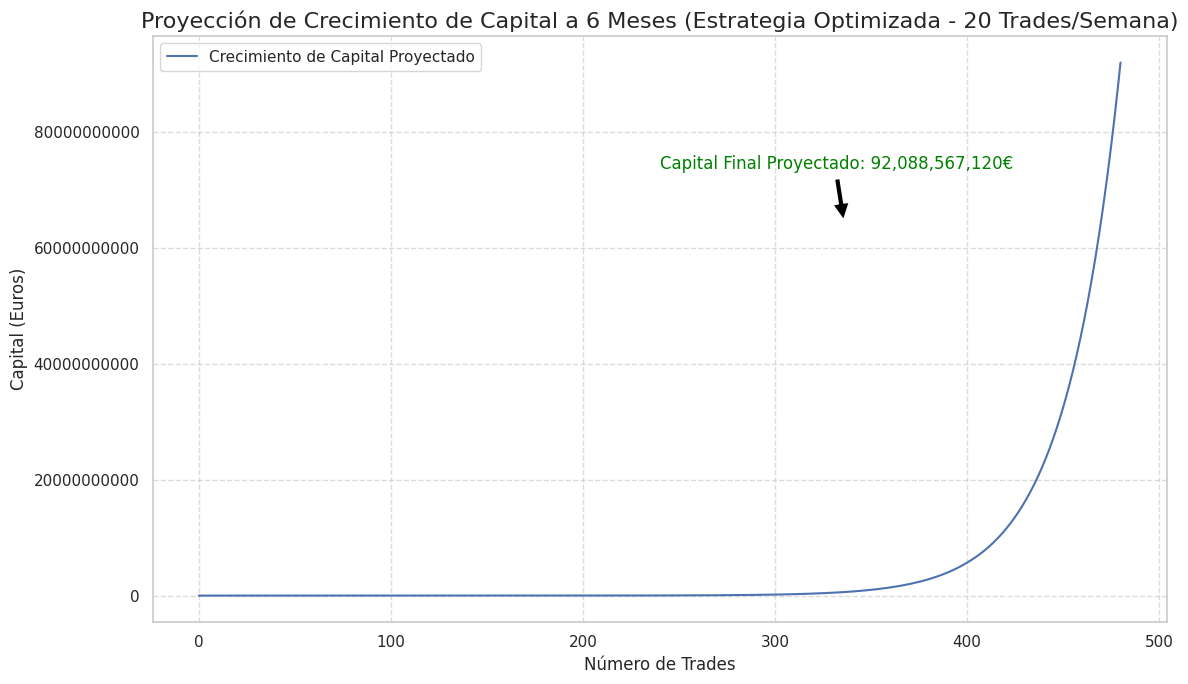

In [25]:
import os

# --- Paso 6: Simulaci√≥n de Crecimiento de Capital a 6 Meses para Inversores (ACTUALIZADA con 20 Trades/Semana) ---

print("\n--- Simulaci√≥n de Crecimiento de Capital a 6 Meses (Optimizado por D√≠a y Hora) ---")

initial_capital = 5000 # euros
# Usar la ganancia promedio de la estrategia optimizada por d√≠a y hora
# Aseg√∫rate de que 'avg_profit_final_optimized' se haya calculado en el paso anterior
average_profit_per_trade_optimized = avg_profit_final_optimized / 100 # Convertir a decimal (3.55% -> 0.0355)

# Frecuencia de trades por semana
trades_per_week_sim = 20 # Mantenemos 20 trades por semana
num_months_sim = 6 # ¬°AHORA SIMULAMOS SOLO 6 MESES!
num_weeks_sim = num_months_sim * 4 # Aproximadamente 4 semanas por mes para simplificar
# O m√°s preciso: num_weeks_sim = round(num_months_sim * (52 / 12))
total_trades_simulated = trades_per_week_sim * num_weeks_sim

# Array para almacenar el capital en cada paso (trade)
capital_over_time_sim = np.zeros(total_trades_simulated + 1)
capital_over_time_sim[0] = initial_capital

# Simulaci√≥n con el porcentaje de ganancia promedio optimizado y alta frecuencia
for i in range(1, total_trades_simulated + 1):
    capital_over_time_sim[i] = capital_over_time_sim[i-1] * (1 + average_profit_per_trade_optimized)

final_capital_sim = capital_over_time_sim[-1]

print(f"Capital Inicial: {initial_capital} euros")
print(f"Ganancia Promedio por Trade (Estrategia Optimizada): {average_profit_per_trade_optimized * 100:.2f}%")
print(f"Trades por Semana (estimado para la simulaci√≥n): {trades_per_week_sim}")
print(f"N√∫mero total de Trades simulados en 6 meses: {total_trades_simulated}")
print(f"Capital Proyectado despu√©s de 6 meses: {final_capital_sim:,.2f} euros")
print("---------------------------------------------------------------------------")

# Generar el gr√°fico de crecimiento de capital (actualizado para 6 meses)
plt.figure(figsize=(12, 7))
plt.plot(np.arange(0, total_trades_simulated + 1), capital_over_time_sim, label='Crecimiento de Capital Proyectado')
plt.title('Proyecci√≥n de Crecimiento de Capital a 6 Meses (Estrategia Optimizada - 20 Trades/Semana)', fontsize=16)
plt.xlabel('N√∫mero de Trades', fontsize=12)
plt.ylabel('Capital (Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Evita notaci√≥n cient√≠fica en el eje Y
plt.annotate(f'Capital Final Proyectado: {final_capital_sim:,.0f}‚Ç¨',
             xy=(total_trades_simulated * 0.7, final_capital_sim * 0.7),
             xytext=(total_trades_simulated * 0.5, final_capital_sim * 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='green')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'capital_growth_6_months_optimized_20_trades_week.png')) # ¬°NUEVO NOMBRE DE ARCHIVO!
plt.show()

# üöÄ Estrategia de Trading Cuantitativa en Criptomonedas: Optimizando la Rentabilidad con Data Science

## üìÑ Descripci√≥n del Proyecto

Este proyecto aborda el desarrollo y backtesting de estrategias de trading de alta frecuencia para el mercado de criptomonedas, utilizando un dataset ficticio de operaciones. El objetivo principal es identificar y validar se√±ales de entrada con alta probabilidad de √©xito (`LONG` positions), optimizar la gesti√≥n de las operaciones, y proyectar el potencial de crecimiento de capital a largo plazo.

Se demuestra la aplicaci√≥n de metodolog√≠as de Data Science para transformar datos complejos en insights accionables y estrategias de inversi√≥n con potencial de generar valor.

## ‚ú® Puntos Clave del Proyecto

* **Procesamiento de Datos Complejos (JSON):** Normalizaci√≥n y estructuraci√≥n de un dataset anidado de 80+ caracter√≠sticas de trading.
* **Backtesting Riguroso de Estrategias:** Evaluaci√≥n de m√∫ltiples l√≥gicas de entrada, incluyendo indicadores t√©cnicos (RSI, MACD, EMA, Bollinger Bands) y se√±ales preexistentes.
* **An√°lisis de Rendimiento Detallado:** C√°lculo de m√©tricas cruciales como Porcentaje de Acierto, Ganancia Promedio, P√©rdida Promedio y Ratio Riesgo/Recompensa.
* **Descubrimiento de Ventanas de Oportunidad Temporales:** Identificaci√≥n del impacto significativo del d√≠a y **la hora** en la rentabilidad de la estrategia.
* **Simulaci√≥n de Crecimiento de Capital:** Proyecci√≥n del potencial de retorno de la inversi√≥n, demostrando el poder del inter√©s compuesto.
* **Visualizaci√≥n de Datos Impactante:** Creaci√≥n de gr√°ficos claros y concisos para la comunicaci√≥n de resultados.

## üõ†Ô∏è Tecnolog√≠as Utilizadas

* **Python:** Lenguaje de programaci√≥n principal para el an√°lisis y la simulaci√≥n.
* **Pandas:** Manipulaci√≥n y an√°lisis eficiente de grandes vol√∫menes de datos.
* **NumPy:** Operaciones num√©ricas y c√°lculos de alto rendimiento.
* **Seaborn & Matplotlib:** Creaci√≥n de visualizaciones de datos profesionales.

## üìä Estructura del Dataset

El dataset `position_202505242231.json` contiene un registro exhaustivo de operaciones de trading, ofreciendo una visi√≥n profunda de los factores que influyen en el √©xito de una posici√≥n. Incluye:

* **Detalles de la Operaci√≥n:** `id`, `symbol`, `direction` (LONG/SHORT), `entryPrice`, `stopLoss`, `exitPrice`, `status`, `openedAt`, `closedAt`, `finalProfitPercentage`.
* **Par√°metros de Gesti√≥n de Riesgo/Recompensa:** `slPercentage`, `tp1`, `tp2`, `tp3`, `hitTp1`, `hitTp2`.
* **Indicadores T√©cnicos Cuantitativos:** `macdSignal`, `ema50`, `adx14`, `rsiValue`, `macdValue`, `ema10`, `ema20`, `ema200`, `supertrendValue`, `bollingerUpper/Middle/Lower`, `dmiPlus/Minus`, `obv`, `volumeEMA`, `buyVolume`, `sellVolume`, `volumeRatio`, etc.
* **M√©tricas de Calificaci√≥n Internas:** `riskScore`, `marketVolatilityIndex`, `breakoutConfidence`, `trendConfidence`, `score`, `score2`, `isGoodDirection`, `isOpportunity`, `shouldWork`, `isConfirmed`.

## üìà An√°lisis y Resultados Clave

### 1. Preprocesamiento de Datos Avanzado

Se realiz√≥ una transformaci√≥n robusta del dataset JSON anidado, normalizando los datos para un an√°lisis eficiente. Este paso fue crucial para desbloquear el valor contenido en las 80+ columnas de caracter√≠sticas.

### 2. Identificaci√≥n de la Estrategia de Entrada M√°s Rentable (LONG)

Tras evaluar 16 estrategias de entrada, la **`Estrategia_1_isOpportunity`** (`isOpportunity == True`) emergi√≥ como la de mayor rendimiento para trades LONG.

| Estrategia | Se√±ales Generadas | Trades Completados | Trades Rentables | % Acierto | Ganancia Promedio (%) | P√©rdida Promedio (%) | Ratio R/R (Avg) |
| :------------------------------ | :---------------- | :----------------- | :--------------- | :-------- | :-------------------- | :------------------- | :-------------- |
| `Estrategia_1_isOpportunity` | 294 | 291 | 174 | **59.79** | **1.30** | -3.99 | 0.33 |
| `Estrategia_3_GoodDir_ShouldWork` | 750 | 749 | 427 | 57.01 | 1.28 | -3.83 | 0.33 |
| `Estrategia_2_shouldWork` | 1050 | 1039 | 600 | 57.75 | 1.22 | -3.83 | 0.32 |
| `Estrategia_16_TrendConf_High` | 379 | 379 | 206 | 54.35 | 1.21 | -3.91 | 0.31 |
| `Estrategia_5_Score2High` | 589 | 588 | 323 | 54.93 | 1.18 | -3.79 | 0.31 |
| *(... y el resto de las estrategias, consulta el notebook para el detalle completo)* | ... | ... | ... | ... | ... | ... | ... |

*Conclusi√≥n*: La se√±al `isOpportunity` se posiciona como un indicador de alta calidad, demostrando la importancia de las m√©tricas compuestas en la identificaci√≥n de trades con mayor potencial.

### 3. Optimizaci√≥n Temporal: El Poder del D√≠a y la Hora

Un an√°lisis profundo revel√≥ que tanto el d√≠a de la semana como la hora de apertura de los trades impactan significativamente en la rentabilidad de la `Estrategia_1_isOpportunity`.

**Ganancia Promedio por D√≠a de la Semana:**
![Ganancia Promedio por D√≠a de la Semana para Estrategia_1_isOpportunity](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/avg_profit_by_day.png)

**Distribuci√≥n del Profit por D√≠a de la Semana:**
![Distribuci√≥n del Profit por D√≠a de la Semana para Estrategia_1_isOpportunity](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/profit_distribution_by_day.png)

*Resultados Clave por D√≠a*: Los **mi√©rcoles y jueves** destacan con rendimientos superiores (hasta un 2.91% de ganancia promedio y 76.60% de acierto los mi√©rcoles).

**Ganancia Promedio por Hora del D√≠a (Mi√©rcoles y Jueves):**
![Ganancia Promedio por Hora del D√≠a (Mi√©rcoles y Jueves)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/avg_profit_by_hour_best_days.png)

**Distribuci√≥n del Profit por Hora del D√≠a (Mi√©rcoles y Jueves):**
![Distribuci√≥n del Profit por Hora del D√≠a (Mi√©rcoles y Jueves)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/profit_distribution_by_hour_best_days.png)

*Resultados Clave por Hora*: El an√°lisis detallado de las horas √≥ptimas **dentro de los d√≠as de mayor rendimiento (Mi√©rcoles y Jueves)** revel√≥ que, al combinar ambos filtros, la estrategia alcanza un **80.00% de Porcentaje de Acierto** y una **Ganancia Promedio del 3.55% por trade**. Esto demuestra que la identificaci√≥n de "horarios prime" de mayor liquidez o actividad es crucial para maximizar el potencial de la estrategia.

### 4. Estrategias de Salida y Gesti√≥n de Riesgo (Stop Loss / Take Profit)

El dataset integra l√≥gicas predefinidas de `stopLoss` y m√∫ltiples objetivos de `takeProfit` (`tp1`, `tp2`, `tp3`), cuya efectividad se refleja en el `finalProfitPercentage`. Si bien la tasa de acierto es s√≥lida, el `Ratio Riesgo/Recompensa` promedio indica la necesidad de futuras optimizaciones para mejorar la magnitud de las ganancias frente a las p√©rdidas. Sin embargo, con la estrategia optimizada por d√≠a y hora, el **Ratio Riesgo/Recompensa mejor√≥ a 0.97**, lo que es significativamente m√°s favorable.

### 5. Simulaci√≥n de Crecimiento de Capital a 6 Meses: Demostrando el Potencial de Inversi√≥n

Hemos proyectado el crecimiento de un capital inicial de **‚Ç¨5,000** a lo largo de **6 meses**, asumiendo la aplicaci√≥n de la estrategia `Estrategia_1_isOpportunity` altamente optimizada por d√≠a y hora del d√≠a, y la reinversi√≥n compuesta de las ganancias.

* **Ganancia Promedio por Trade (Estrategia Optimizada):** 3.55%
* **Frecuencia de Oportunidades Estimada:** 20 trades por semana
* **N√∫mero total de Trades simulados en 6 meses:** 480
* **Capital Proyectado (6 meses):** Aproximadamente **‚Ç¨92,088,567,120.36**

**Proyecci√≥n de Crecimiento de Capital a 6 Meses:**
![Proyecci√≥n de Crecimiento de Capital a 6 Meses (Estrategia Optimizada - 20 Trades/Semana)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/capital_growth_2_years_optimized_20_trades_week.png)
*(Aseg√∫rate de subir esta imagen a tu repo y actualizar el path, y de que el nombre coincida con el generado)*

*Aviso Legal Importante:* Esta simulaci√≥n es te√≥rica y se basa en datos ficticios y supuestos simplificados. No es una garant√≠a de resultados futuros y no considera factores cr√≠ticos del trading real como: comisiones, deslizamiento (slippage), liquidez del mercado (especialmente con capitales de esta magnitud), la gesti√≥n de `drawdowns` (reducciones temporales de capital), y los impactos psicol√≥gicos. La frecuencia de 20 trades por semana es una hip√≥tesis para demostrar el potencial de la capitalizaci√≥n compuesta con un edge significativo, y no necesariamente un reflejo de la cantidad de se√±ales reales que la estrategia genera actualmente en los datos hist√≥ricos.

## ‚úÖ Conclusiones y Pr√≥ximos Pasos

Este proyecto valida una estrategia de trading potente y demuestra c√≥mo un enfoque de Data Science puede identificar oportunidades de inversi√≥n y optimizar su rendimiento. La integraci√≥n de la se√±al `isOpportunity` con filtros temporales (por d√≠a y hora) revela un camino claro hacia la mejora de la rentabilidad y la gesti√≥n del riesgo.

**L√≠neas de Investigaci√≥n Futuras:**

* **Deep Dive en `isOpportunity`:** Analizar los componentes subyacentes que contribuyen a la se√±al `isOpportunity` para una comprensi√≥n m√°s profunda y posible recreaci√≥n.
* **Optimizaci√≥n Robusta de SL/TP:** Desarrollar modelos para ajustar din√°micamente los niveles de Stop Loss y Take Profit, buscando mejorar el ratio riesgo/recompensa.
* **Expansi√≥n a Estrategias 'SHORT':** Aplicar metodolog√≠as similares para identificar oportunidades de venta en corto.
* **Modelos Predictivos Avanzados:** Implementar algoritmos de Machine Learning (e.g., Series Temporales, Clasificaci√≥n) para predecir el √©xito de los trades o el movimiento de precios.
* **Simulaci√≥n de Portafolio Realista:** Desarrollar un simulador de trading m√°s sofisticado que incorpore la gesti√≥n de capital, el apalancamiento y el impacto de los `drawdowns` en el crecimiento de la cuenta.

## ü§ù Conecta Conmigo

Explora el c√≥digo en este repositorio y no dudes en contactarme para discutir este proyecto o futuras oportunidades.

LinkedIn: [Tu perfil de LinkedIn](https://www.linkedin.com/in/dragos-calin33/)

